# Task 1: Object recognition

The clustering techniques are frequently used to identify 'points of interest' in an unknown image. This is an unsupervised sub-problem of the generic object recognition task. 

The coins dataset is scikit-learn toy dataset. It includes a single picture that displays 24 Greek coins from Pompeii

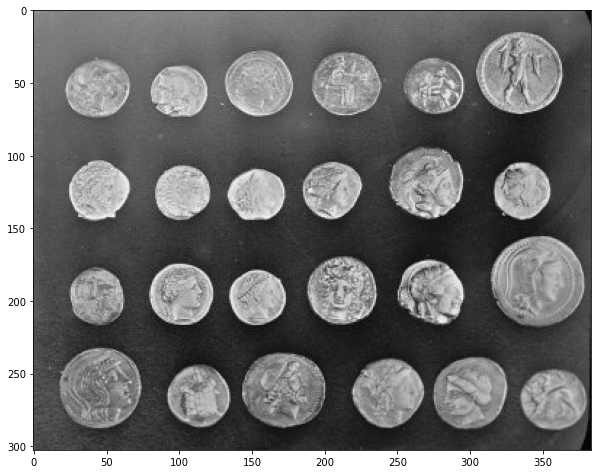

In [2]:
from IPython.display import Image
Image(filename='coins.png', width=400)

Identify the coins by using the K-Means clustering algorithm. Experiment with different values of hyper-parameters, and especially, the initial number of clusters. For 2 initial clusters, your output must be something like this (the colors are random):

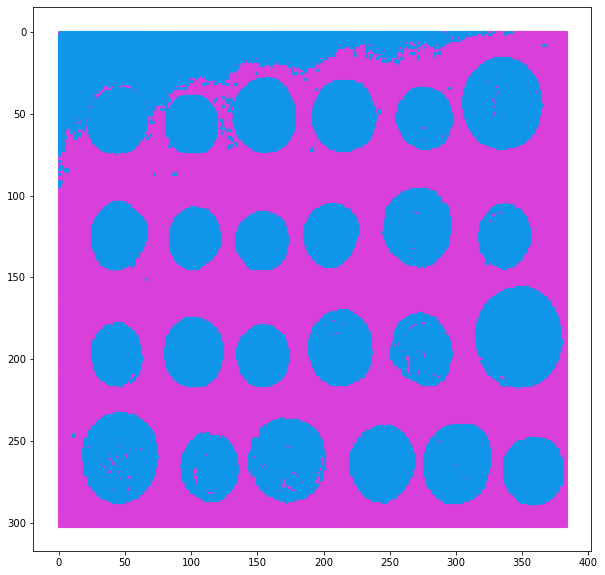

In [3]:
Image(filename='coins_2clusters.png', width=400)

### First simple solution
[kdnuggets - Image Segmentation](https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html)

In [4]:
#pip install opencv-python    #installing cv2 on the notebook

<b><u>Methodology</u></b>

The process will begin by reshaping the image's data so as to be in proper form to use it as input for the K-means algorithm. Continuing, we define the number of clusters to be used for the K-means as well as finding the labels for the proper classes. In conclusion, we expirimented we different number of clusters and realized that the appropriate number of clusters for this use case in two.

In [5]:
# import libraries/modules
import numpy as np , cv2, os
from IPython.display import Image
from PIL import Image
import skimage
from skimage.data import coins
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.cluster import KMeans

In [6]:
orig_coins = coins() # import coins data/array/image
print("orig_coins type: {}".format(type(orig_coins))) # object type: <class 'numpy.ndarray'>
print("orig_coins shape: {}".format(orig_coins.shape)) # (height, width) --> 2 dimensional array
orig_coins # (rows, columns)

orig_coins type: <class 'numpy.ndarray'>
orig_coins shape: (303, 384)


array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

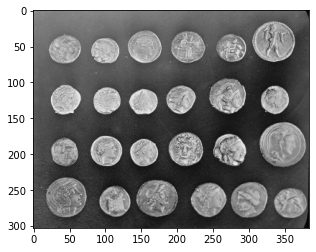

In [7]:
imshow(orig_coins, cmap=plt.cm.gray); # Plot input data/image
plt.imsave('coin.png', orig_coins, cmap=plt.cm.gray) # save/export image

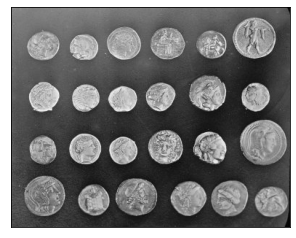

In [8]:
plt.figure(figsize=(5, 5)) # Plot the results on an image
plt.imshow(orig_coins, cmap=plt.cm.gray)
plt.xticks(()), plt.yticks(()), plt.show();

In [9]:
# The K-Means clustering algorithm only takes 2 dimensional input      
# so I am squishing the X & Y dimension into 1 spatial dimension
print(orig_coins.shape) # 303 * 384 = 116352, image's   pixels
vectorized = orig_coins.reshape(-1, 1) # (116352, 1) reshape in order to use k-means
# -1 generate the right number in order to be possible the reshape of array, a single feature
# .reshape(1, -1) if it contains a single sample.
# vectorized = np.float32(orig_coins.flatten()) # 1 dimension array --> (116352,) or (116352,1)
print(vectorized.shape)
vectorized # reshaped dataset/image to work with kmeans

(303, 384)
(116352, 1)


array([[ 47],
       [123],
       [133],
       ...,
       [  4],
       [ 10],
       [  7]], dtype=uint8)

In [10]:
kmeans = KMeans( n_clusters=2) # run 2 clusters kmeans
# kmeans = KMeans(random_state=0, init='random', n_clusters=2)
labels = kmeans.fit_predict(vectorized)                             #2 labels,foreground,background = 0,1
print(labels.shape) # print output shape --> 1 column
print(kmeans.labels_) # print output labels 0 --> 1st cluster, 1 --> 2nd cluster
print(kmeans.cluster_centers_) # print kmeans centroids

(116352,)
[1 0 0 ... 1 1 1]
[[154.64430259]
 [ 60.25473433]]


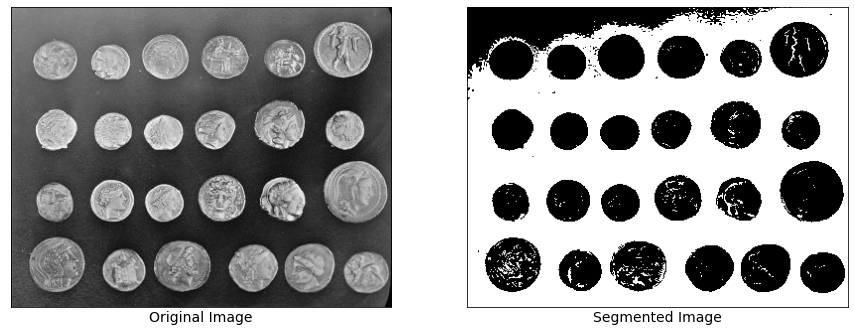

In [11]:
f, axarr = plt.subplots(1,2,figsize=(15,15)) # define rows & columns of figure/plot, size ,axes
plt.setp(axarr, xticks=[], yticks=[]) # remove ticks (axes) from graphs                            
axarr[0].set_xlabel('Original Image', fontsize=14) # xlabel for the 1st graph
axarr[1].set_xlabel('Segmented Image', fontsize=14) # xlabel for the 2nd graph
axarr[0].imshow(orig_coins, cmap=plt.cm.gray) # display the 2 images in grayscale
# Reshaping labels array back into X & Y dimensions to be able to view the image
axarr[1].imshow(labels.reshape(303, 384), cmap=plt.cm.gray)
plt.savefig('clustering_2.png', dpi=300, bbox_inches='tight') # export figure to current directory

In [12]:
kmeans = KMeans(random_state=0, init='random', n_clusters=3) # run 3 clusters kmeans
labels = kmeans.fit_predict(vectorized) # fit & predict model
print('The shape of the labels is: ',labels.shape) # cluster index of pixel
print('\nThe corresponding labels are: ',kmeans.labels_)
print('\nThe cendroids are: ',kmeans.cluster_centers_)

The shape of the labels is:  (116352,)

The corresponding labels are:  [2 0 0 ... 2 2 2]

The cendroids are:  [[105.20349654]
 [172.00861215]
 [ 48.40057849]]


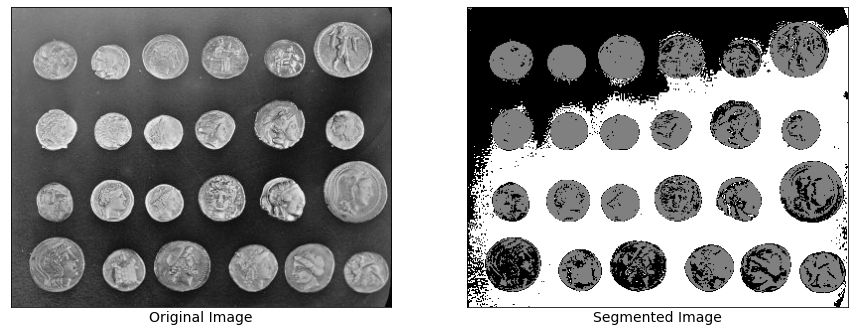

In [13]:
f, axarr = plt.subplots(1,2,figsize=(15,15)) # define rows & columns of figure/plot, size
plt.setp(axarr, xticks=[], yticks=[]) # remove ticks from graphs
axarr[0].set_xlabel('Original Image', fontsize=14) # xlabel for the 1st graph
axarr[1].set_xlabel('Segmented Image', fontsize=14) # xlabel for the 2nd graph
axarr[0].imshow(orig_coins, cmap=plt.cm.gray) # display the 2 images in grayscale
# Reshaping labels array back into X & Y dimensions to be able to view the image
axarr[1].imshow(labels.reshape(303, 384), cmap=plt.cm.gray)
plt.savefig('clustering_3.png', dpi=300, bbox_inches='tight') # export figure to current directory

Looking the image with 2 and 3 clusters, it can be concluded that the 2 clusters makes more sense in this case.

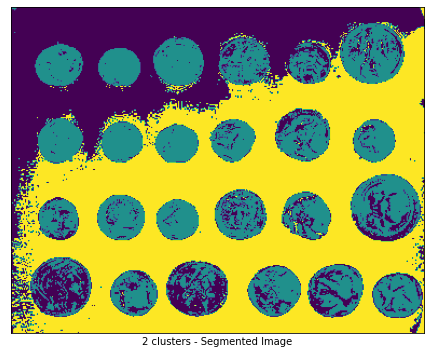

In [14]:
def myplot(k): # plot each different cluster by a function
    plt.figure(figsize=(12,6)) # define size of figure/plot
    # plt.grid() # add gridlines
    # plt.title('Segmented Image')
    plt.xticks([]), plt.yticks([]) # plt.xticks(np.arange(1,n,1))
    if k ==1:
        plt.xlabel("Original Image") # , plt.ylabel("WCSS")
        plt.imshow(orig_coins, cmap=plt.cm.gray) # display the image in grayscale
    else:
        plt.xlabel("{} clusters - Segmented Image".format(k))
        plt.imshow(labels.reshape(303, 384)) # display the image with colour
        # plt.imshow(labels.reshape(303, 384), cmap=plt.cm.gray) # display the image in grayscale
        # plt.savefig('{} clusters - Segmented Image.png'.format(k), dpi=300, bbox_inches='tight')
myplot(2)

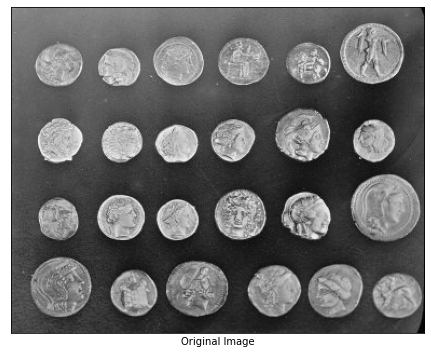

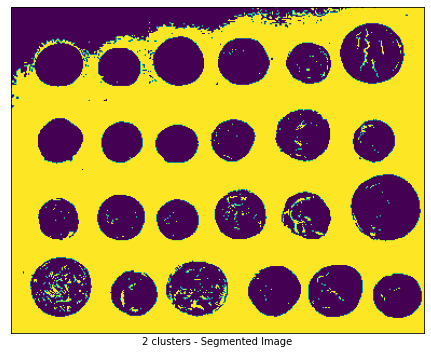

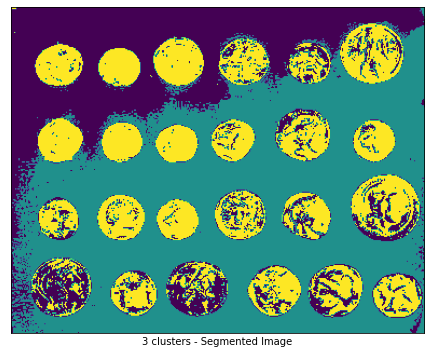

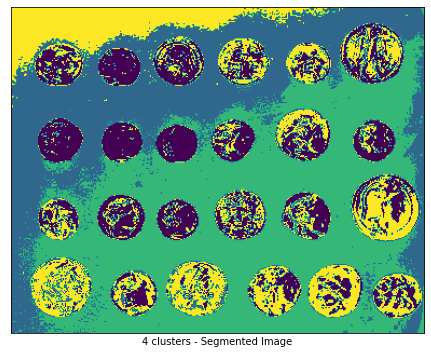

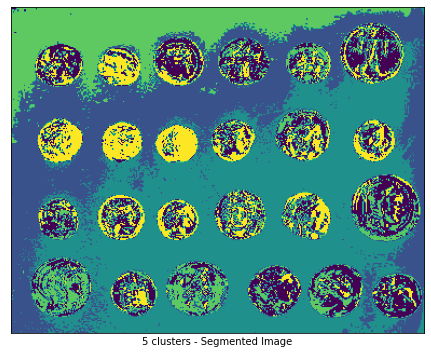

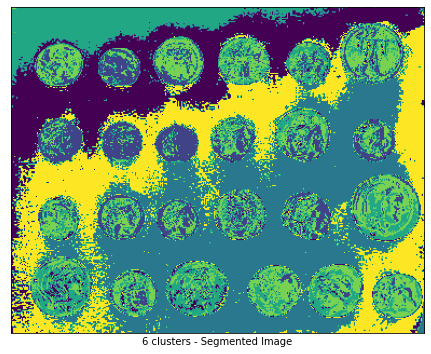

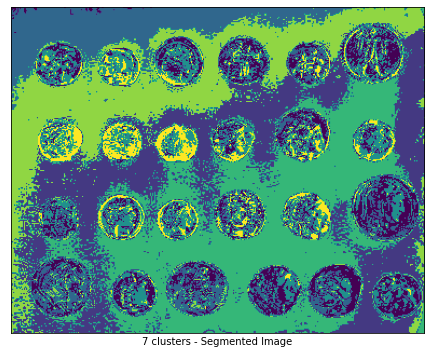

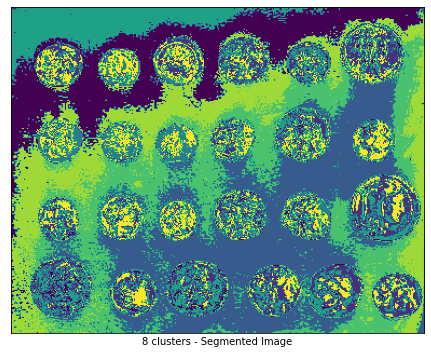

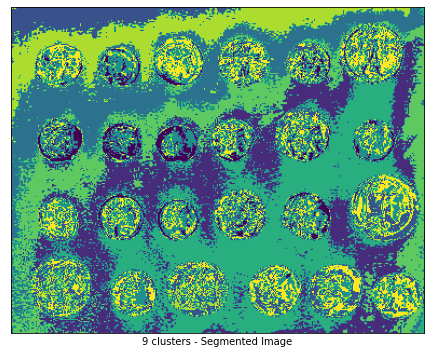

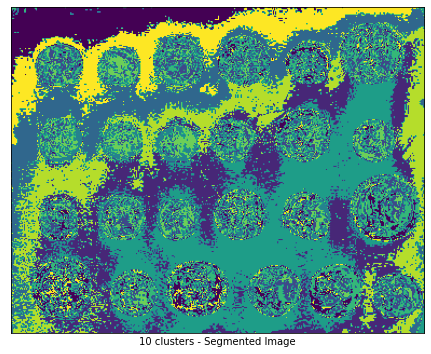

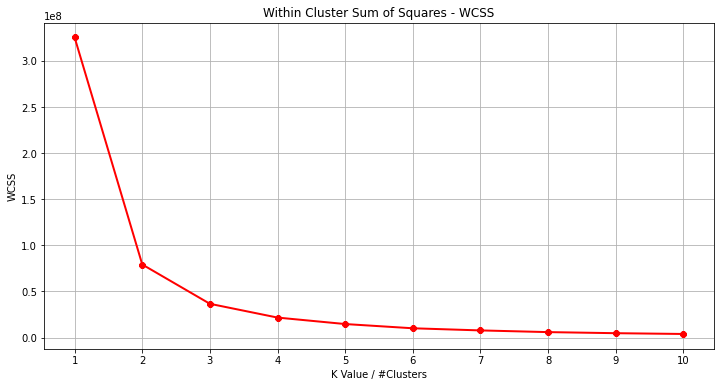

In [15]:
wcss = [] # elbow method to identify the perfect number of clusters
n = 10 # number of clusters
for k in range(1,n+1):
    kmeans = KMeans(n_clusters=k, init="k-means++") # define kmeans model
    # kmeans.fit(vectorized)
    labels = kmeans.fit_predict(vectorized) # fit & predict model
    myplot(k)
    wcss.append(kmeans.inertia_) # store inertia value to a wcss list

plt.figure(figsize=(12,6))
plt.grid()                                                                        
plt.title("Within Cluster Sum of Squares - WCSS")
plt.plot(range(1,n+1),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value / #Clusters")
plt.xticks(np.arange(1,n+1,1)) # (start, stop-1, step)
plt.ylabel("WCSS")
plt.savefig('WCSS_{}.png'.format(n), dpi=300, bbox_inches='tight'); # export figure
                                                                                 

Two clusters is more appropriate for this assignment and it can be concluded either by looking at the image's plots of various clusters or by the plot of the elbow method. 

# Second solution

https://www.youtube.com/watch?v=STnoJ3YCWus https://github.com/stefanv/teaching/blob/master/skimage/coin_segmentation_tutorial.ipynb?fbclid=IwAR3XN9sbpOCYdYASxKk7Bjk-o8DCY5_fUr3NjXOl3E4x2O_MMaVAPQHR1sI

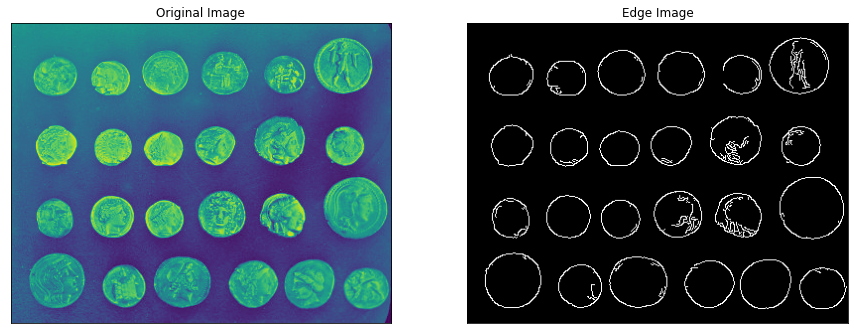

In [16]:
# Canny Edge detection
#finding the edges of the coins with canny edge detector from Scikit images sub module
figure_size = 15
img = orig_coins
edges = cv2.Canny(img,615,150)                                    
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

The image has been denoised by applying the edge detection (Inspecting the "Edge Image"). 

<class 'PIL.PngImagePlugin.PngImageFile'>


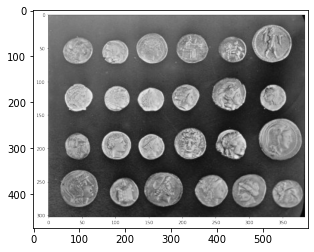

In [17]:
img = Image.open('coins.png') # load image from current directory
print(type(img)) # PIL.PngImagePlugin.PngImageFile
imshow(img);

<class 'numpy.ndarray'>


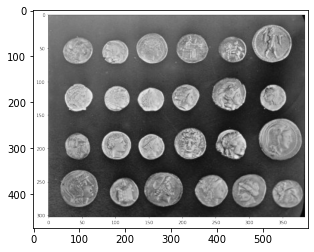

In [18]:
x = np.array(img) # convert image to array
print(type(x)) # <class 'numpy.ndarray'>
imshow(x);

In [19]:
y = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
print(type(y))
print(y.shape)
print(y)
print(y.reshape(6, 2, 1).shape)
print(y.reshape(6, 2, 1))

<class 'numpy.ndarray'>
(6, 2)
[[ 1  2]
 [ 1  4]
 [ 1  0]
 [10  2]
 [10  4]
 [10  0]]
(6, 2, 1)
[[[ 1]
  [ 2]]

 [[ 1]
  [ 4]]

 [[ 1]
  [ 0]]

 [[10]
  [ 2]]

 [[10]
  [ 4]]

 [[10]
  [ 0]]]


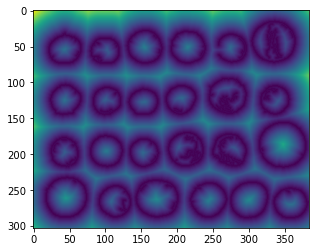

In [20]:
#watershed algorithm to find the new regions (where the water joins by placing and activating fountains inside the coins)
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)#Euclidean distance (distance to the closest background pixel) transform on the negative of the edges

plt.imshow(dt); #the landscape to fill using watershed

C:\Users\User\AppData\Local\Temp/ipykernel_14284/1897066258.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = feature.peak_local_max(dt, indices=False, min_distance=5)


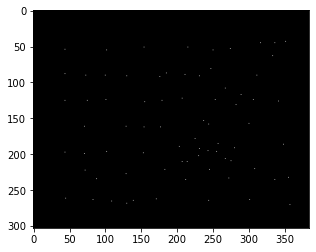

In [21]:
from skimage import feature
from skimage.feature import peak_local_max
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray');

In [22]:
#finding the actual peaks
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)
peak_idx[:5]  #printing the first 5 coordinates of the peaks

C:\Users\User\AppData\Local\Temp/ipykernel_14284/2899186130.py:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)


array([[186, 348],
       [261,  45],
       [ 91, 130],
       [ 90,  73],
       [161,  71]], dtype=int64)

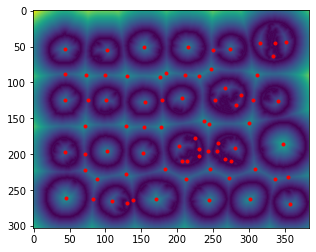

In [23]:
plt.plot(peak_idx[:,1], peak_idx[:,0], 'r.') #all the positions of the fountains on the landscape
plt.imshow(dt);

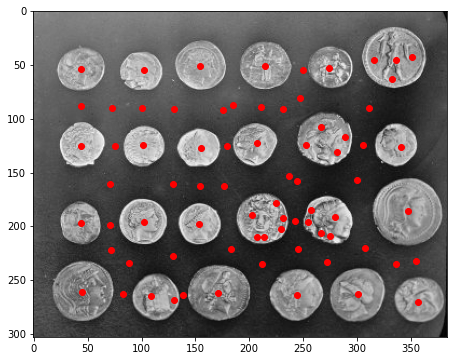

In [24]:
# overlay local_max point to original image
plt.figure(figsize=(12,6)) # define size of figure/plot
# local_max # F,F,F,T --(*1)--> 0,0,0,1
mask = np.argwhere(local_max * 1 == 1)
plt.imshow(orig_coins, cmap=plt.cm.gray) # display the image in grayscale
plt.scatter(mask[:,1], mask[:,0], marker='o', color="red"); # centers

In [25]:
#labeling the above fountains
from skimage import measure

markers = measure.label(local_max)

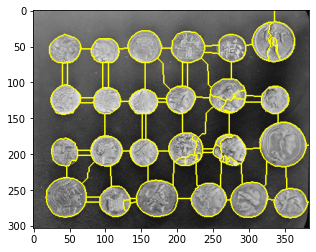

In [26]:
from skimage import morphology, segmentation
# AttributeError: module 'skimage.morphology' has no attribute 'watershed'
labels = skimage.segmentation.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(orig_coins, labels));
#This method links together the foreground(coins) so as to be easier to be classified as one cluster.

C:\Users\User\AppData\Local\Temp/ipykernel_14284/609584055.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(labels, image=orig_coins));  #coloring the labels


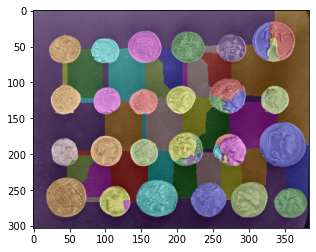

In [27]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=orig_coins));  #coloring the labels

C:\Users\User\AppData\Local\Temp/ipykernel_14284/333033436.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(labels, image=orig_coins, kind='avg').astype('uint8'), cmap='gray');


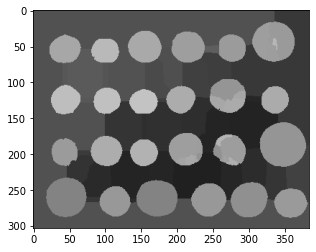

In [28]:
plt.imshow(color.label2rgb(labels, image=orig_coins, kind='avg').astype('uint8'), cmap='gray');

In [29]:
#identifying all the regions-objects
regions = measure.regionprops(labels, intensity_image=orig_coins)

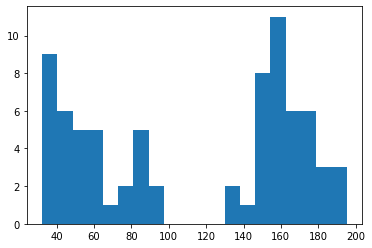

In [30]:
#computing the means intensity for those regions
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);
#left:obects associated with the background
#Right:objects associated with the coins

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)   #centroids for the two clusters

[[ 57.38281825]
 [163.07400522]]


In [32]:
#predict label for each region 1:foreground(coins) 0:background
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1])

In [33]:
#copying the labels
classified_labels = labels.copy()
#combining the predicted labels with the regions and relabeling the image according to the coordinates of each region 
#and assigning that to foreground or background
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

C:\Users\User\AppData\Local\Temp/ipykernel_14284/2717830035.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(classified_labels, image=orig_coins)); #plot image with two clusters


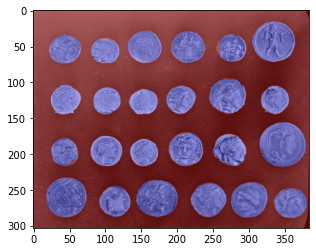

In [34]:
plt.imshow(color.label2rgb(classified_labels, image=orig_coins)); #plot image with two clusters

### 3 clusters

In [35]:
model2 = KMeans(n_clusters=3)

region_means = np.array(region_means).reshape(-1, 1)
model2.fit(np.array(region_means).reshape(-1, 1))
print(model2.cluster_centers_)

[[163.07400522]
 [ 44.05247154]
 [ 77.37833832]]


In [36]:
bg_fg_labels = model2.predict(region_means)
bg_fg_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0])

In [37]:
region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))

KMeans(n_clusters=2)

In [38]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

C:\Users\User\AppData\Local\Temp/ipykernel_14284/2928662404.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(classified_labels, image=orig_coins));


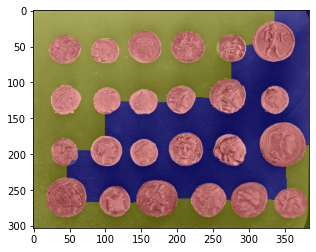

In [39]:
plt.imshow(color.label2rgb(classified_labels, image=orig_coins));

### 4 clusters

In [40]:
model4 = KMeans(n_clusters=4)

region_means = np.array(region_means).reshape(-1, 1)
model4.fit(np.array(region_means).reshape(-1, 1))
print(model4.cluster_centers_)

[[ 44.05247154]
 [176.4164044 ]
 [ 77.37833832]
 [152.1574968 ]]


In [41]:
bg_fg_labels = model4.predict(region_means)
bg_fg_labels

array([3, 3, 1, 1, 3, 3, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1, 3, 3, 3,
       3, 0, 1, 3, 3, 1, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 3, 3, 3, 3])

In [42]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

C:\Users\User\AppData\Local\Temp/ipykernel_14284/2928662404.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(color.label2rgb(classified_labels, image=orig_coins));


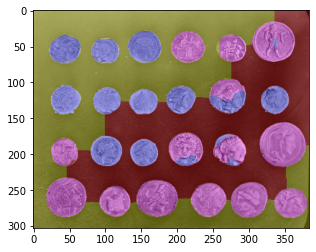

In [43]:
plt.imshow(color.label2rgb(classified_labels, image=orig_coins));